In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
df = pd.read_excel(r'C:\Users\Gexec\Desktop\New folder\New folder\Econometrics2022\Survey.xlsx')

In [13]:
df.head()

,interview__key,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
0,00-02-43-24,2019.09,6,1,4,4,156.330247,16142.559524,130.357143,0.0,...,0.0,0.0,0.0,0.0,1.0,1,4,2,NaN,NaN
1,00-02-53-94,2019.11,7,1,1,1,199.569444,15403.869048,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1,3,2,NaN,1.0
2,00-02-68-45,2019.11,1,1,1,1,164.703704,44234.523810,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,1,3,2,NaN,1.0
3,00-09-10-75,2019.11,8,1,3,3,185.768519,34283.928571,76.041667,0.0,...,0.0,1.0,0.0,0.0,0.0,1,3,2,NaN,NaN
4,00-10-58-42,2019.03,8,2,5,5,126.657407,22530.059524,12678.363641,0.0,...,0.0,1.0,0.0,0.0,0.0,2,5,1,NaN,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   interview__key    5165 non-null   object 
 1   date_q            5165 non-null   float64
 2   hh_02             5165 non-null   int64  
 3   settlement        5165 non-null   int64  
 4   members           5165 non-null   int64  
 5   memnal            5165 non-null   int64  
 6   weight            5165 non-null   float64
 7   fdpurch           5165 non-null   float64
 8   fdcons            5165 non-null   float64
 9   fdout             5165 non-null   float64
 10  Z1                5165 non-null   float64
 11  nfdpurch          5165 non-null   float64
 12  nonfdgif          5165 non-null   float64
 13  durble            5165 non-null   float64
 14  expend            5165 non-null   float64
 15  monincome         5165 non-null   float64
 16  totincome         5165 non-null   float64


In [15]:
df.isnull().sum()

interview__key       0
date_q               0
hh_02                0
settlement           0
members              0
                  ... 
hous_39              0
hous_44              0
soc_01               0
soc_05            4593
hous_47_8         1823
Length: 65, dtype: int64

In [16]:
df.describe()

,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,Z1,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
count,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,...,5107.000000,5149.000000,5092.000000,5090.000000,5093.000000,5165.000000,5165.000000,5165.000000,572.000000,3342.000000
mean,2019.065202,4.890997,1.374637,3.611617,3.409681,155.532817,54702.727893,8497.762933,2825.854441,3622.937588,...,0.186019,0.478928,0.001375,0.007662,0.340860,1.532043,2.904937,1.881897,877.486014,1.238181
std,0.034425,3.343538,0.484076,1.954404,1.894543,73.313942,41767.069890,15846.047589,10181.098053,2475.731163,...,0.389160,0.499604,0.037055,0.087206,0.474045,0.808306,0.740852,0.322761,17632.243041,0.482687
min,2019.010000,1.000000,1.000000,1.000000,1.000000,21.481481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2019.040000,1.000000,1.000000,2.000000,2.000000,109.824074,25550.000000,0.000000,0.000000,1914.077381,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000
50%,2019.070000,5.000000,1.000000,3.000000,3.000000,156.330247,44611.111111,1064.583333,0.000000,3017.656198,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,6.000000,1.000000
75%,2019.100000,8.000000,2.000000,5.000000,5.000000,192.638889,72761.011905,10430.597342,0.000000,4569.582184,...,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,10.000000,1.000000
max,2019.120000,11.000000,2.000000,15.000000,15.000000,326.879630,499923.263889,147600.133929,234642.857143,22711.973253,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,2.000000,420000.000000,3.000000


In [18]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

c:\Users\Gexec\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='members'>

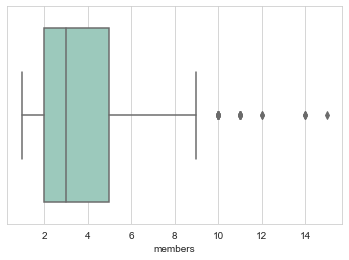

In [19]:
sns.boxplot(df['members'])

<AxesSubplot:xlabel='hh_02', ylabel='weight'>

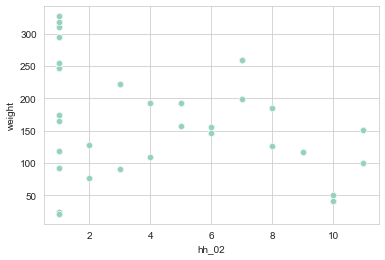

In [20]:
sns.scatterplot(data=df, x='hh_02', y='weight')

<AxesSubplot:xlabel='weight', ylabel='Count'>

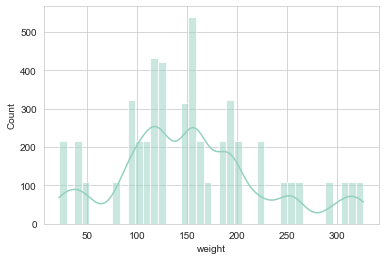

In [21]:
sns.histplot(data=df, x='weight', bins=40, kde=True)

In [ ]:
sns.jointplot(x='weight', y='Z1', data=df)

: 

In [24]:
sns.pairplot(df)

: 

: 

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
color_map = ["#4A4655" for _ in range(33)]
color_map[0] = "#4898EF"
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.bar(df["weight"], df['fdpurch'],color=color_map)
plt.ylabel("fdpurch")
plt.title("date_q")
plt.show()

: 

In [ ]:
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
sns.lineplot(x="weight", y = "fdpurch", data = df)
plt.show()

In [ ]:
df.columns

In [ ]:
df_5 = df.nlargest(5, 'fdcons')
df_5

In [ ]:
sns.lmplot(x='fdpurch', y = 'fdcons', data=df)

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
df.columns